In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data_dir = "/content/gdrive/MyDrive/plant"

In [4]:
import os

In [5]:
os.listdir(data_dir)

['beemar', 'swasth']

In [6]:
exten = ["jpg","jpeg","bmp","png"]

In [7]:
import cv2
import imghdr

In [8]:
for status in os.listdir(data_dir):
  for img in os.listdir(os.path.join(data_dir,status)):
    img_path = os.path.join(data_dir,status,img)
    try:
      img = cv2.imread(img_path)
      wt = imghdr.what(img_path)
      if wt not in exten:
        print(f"image dont exist in exten {img_path}")
        os.remove(img_path)
    except Exception as e:
      print(f"problem with image {img_path}")





In [9]:
import tensorflow as tf
import keras

In [10]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [11]:
tf.keras.utils.image_dataset_from_directory??

In [12]:
#data pipeline / auromatically reshapes images too (256*256)
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 541 files belonging to 2 classes.


In [13]:
data_iter = data.as_numpy_iterator()

In [14]:
data_iter

In [15]:
##get a batch from iterator
batch = data_iter.next()

In [16]:
batch[0].shape
#32 colored images

(32, 256, 256, 3)

In [17]:
batch[1]

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

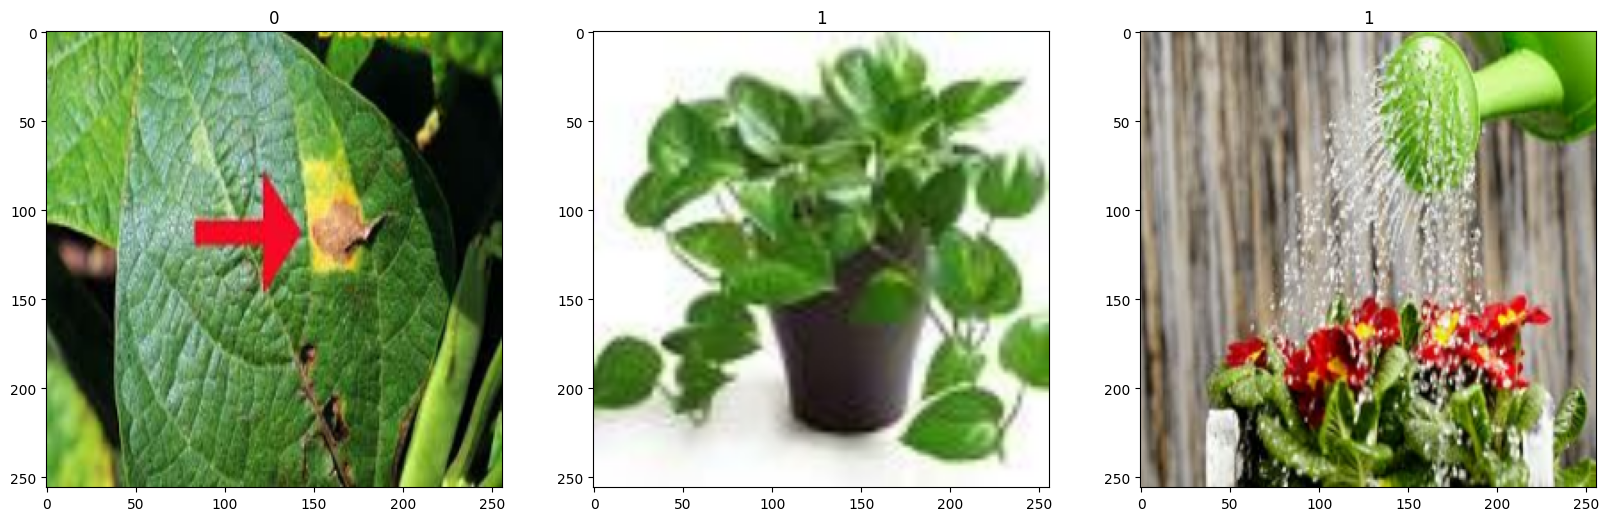

In [18]:
fig,ax = plt.subplots(ncols = 3,figsize = (20,20))
for i,img in enumerate(batch[0][:3]):
  ax[i].imshow(img.astype(int))
  ax[i].title.set_text(batch[1][i])

In [19]:
##class0==> beemar plants

## Preprocessing

In [20]:
print(batch[0].min())
print(batch[0].max())

0.0
255.0


In [21]:
##scaling
#x-->image array
#y-->label
data = data.map(lambda x,y:(x/255,y))

In [23]:
batch = data.as_numpy_iterator().next()

In [27]:
batch[0].shape

(32, 256, 256, 3)

In [26]:
batch[0].max()
batch[0].min()

0.0

## Train-Test split

In [29]:
len(data)
#conatins 17 batches and each batch have 32 images

17

In [34]:
train_size = int(len(data)*0.7)
test_size = int(len(data)*0.2)-1
vali_size = int(len(data)*0.1)+3

In [35]:
print(train_size)
print(test_size)
print(vali_size)

11
2
4


In [37]:
train = data.take(train_size)
vali = data.skip(train_size).take(vali_size)
test = data.skip(train_size+vali_size).take(test_size)


## Model Building

In [38]:
from tensorflow.keras.models import Sequential

In [40]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [44]:
model = Sequential()
model.add(Conv2D(16,(3,3),1,activation = "relu",input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation = "relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation = "relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256,activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))

In [43]:
MaxPooling2D??

In [45]:
model.compile("adam",loss = "binary_crossentropy",metrics = "accuracy")

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [48]:
history = model.fit(train,epochs = 10,validation_data = vali)

Epoch 1/10
11/11 [==============================] - 13s 419ms/step - loss: 0.7966 - accuracy: 0.5909 - val_loss: 0.6815 - val_accuracy: 0.8125
Epoch 2/10
11/11 [==============================] - 8s 631ms/step - loss: 0.6612 - accuracy: 0.6705 - val_loss: 0.6248 - val_accuracy: 0.6875
Epoch 3/10
11/11 [==============================] - 7s 543ms/step - loss: 0.5522 - accuracy: 0.7472 - val_loss: 0.5304 - val_accuracy: 0.7812
Epoch 4/10
11/11 [==============================] - 8s 627ms/step - loss: 0.4681 - accuracy: 0.8097 - val_loss: 0.4818 - val_accuracy: 0.8125
Epoch 5/10
11/11 [==============================] - 9s 701ms/step - loss: 0.4010 - accuracy: 0.8494 - val_loss: 0.3567 - val_accuracy: 0.8984
Epoch 6/10
11/11 [==============================] - 7s 527ms/step - loss: 0.3402 - accuracy: 0.8494 - val_loss: 0.2900 - val_accuracy: 0.9219
Epoch 7/10
11/11 [==============================] - 8s 625ms/step - loss: 0.2220 - accuracy: 0.9290 - val_loss: 0.1436 - val_accuracy: 0.9609
Epoch

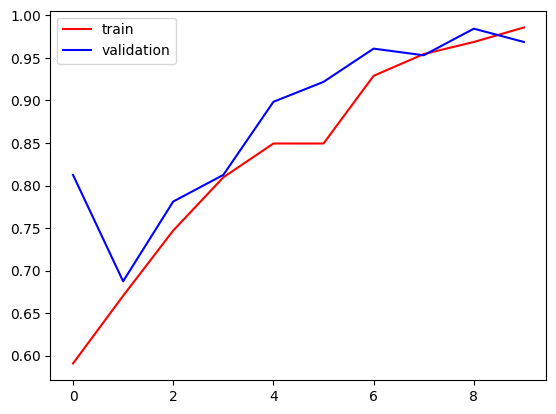

In [49]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

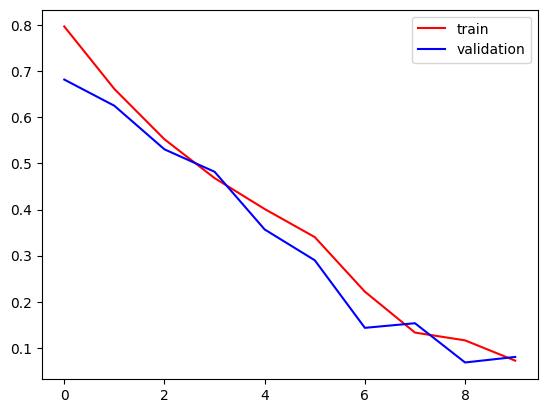

In [50]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

## Evaluation

In [51]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [54]:
precision = Precision()
recall = Recall()
bac = BinaryAccuracy()

In [55]:
for batch in test.as_numpy_iterator():
  x,y = batch
  y_prob = model.predict(x)
  precision.update_state(y,y_prob)
  recall.update_state(y,y_prob)
  bac.update_state(y,y_prob)



1/1 [==============================] - 1s 527ms/step


In [59]:
print(precision.result().numpy())
print(recall.result())
print(bac.result())


0.93333334
tf.Tensor(0.93333334, shape=(), dtype=float32)
tf.Tensor(0.9672131, shape=(), dtype=float32)


## Test random image

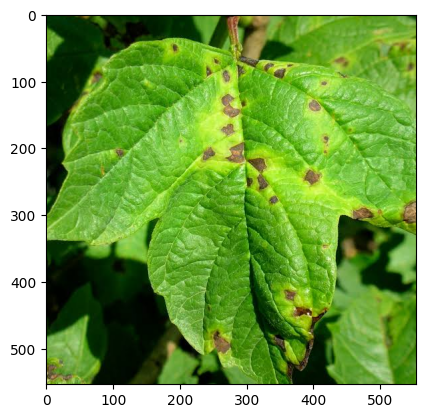

In [76]:
img = cv2.imread("/content/green.jpeg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [77]:
resized = tf.image.resize(img,(256,256))

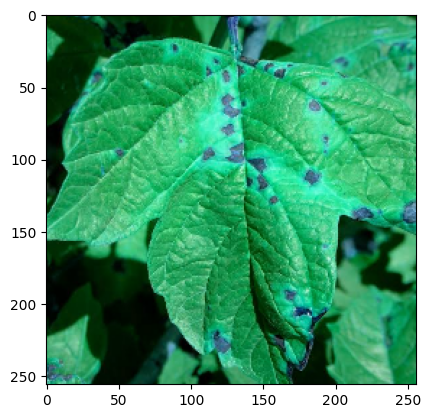

In [78]:
plt.imshow(resized.numpy().astype("int"))

In [79]:
resized.shape

TensorShape([256, 256, 3])

In [80]:
##since our model expects the image from a batch that's why adding extra dimension
np.expand_dims(resized,0).shape

(1, 256, 256, 3)

In [81]:
final = np.expand_dims(resized/255,0)

In [82]:
model.predict(final)[0]

1/1 [==============================] - 0s 19ms/step


array([0.00223483], dtype=float32)